we’ll use wine dataset of Scikit-Learn. Before proceeding further, we’ll load and prepare the data.

In [2]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.DataFrame(load_wine()["data"],columns=load_wine()["feature_names"])
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


**Box plots**
are a visual method to identify outliers. Box plots is one of the many ways to visualize data distribution. Box plot plots the q1 (25th percentile), q2 (50th percentile or median) and q3 (75th percentile) of the data along with (q1–1.5*(q3-q1)) and (q3+1.5*(q3-q1)). Outliers, if any, are plotted as points above and below the plot.

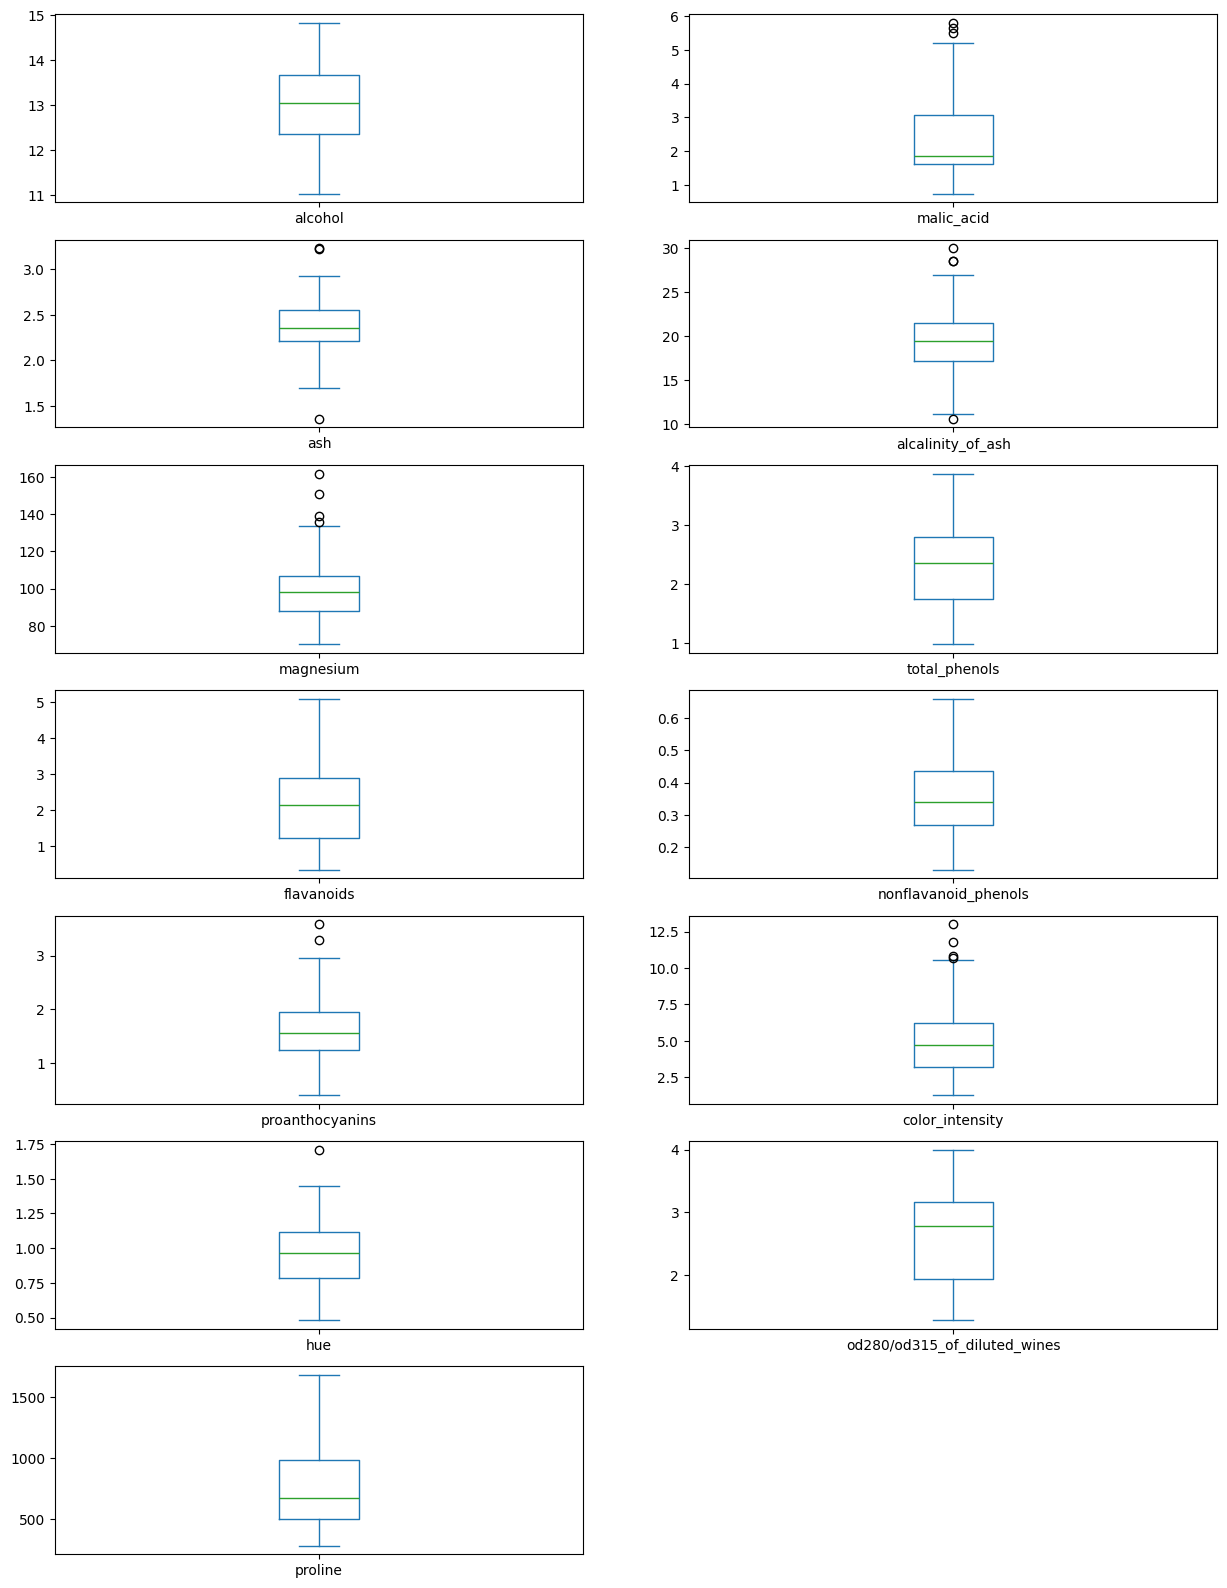

In [6]:
data.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

**IQR method** is used by box plot to highlight outliers. IQR stands for interquartile range, which is the difference between q3 (75th percentile) and q1 (25th percentile). The IQR method computes lower bound and upper bound to identify outliers.\
$Lower Bound = q1–1.5*IQR$ \
$Upper Bound = q3+1.5*IQR$ \
Any value below the lower bound and above the upper bound are considered to be outliers. Below is the implementation of IQR method in Python.

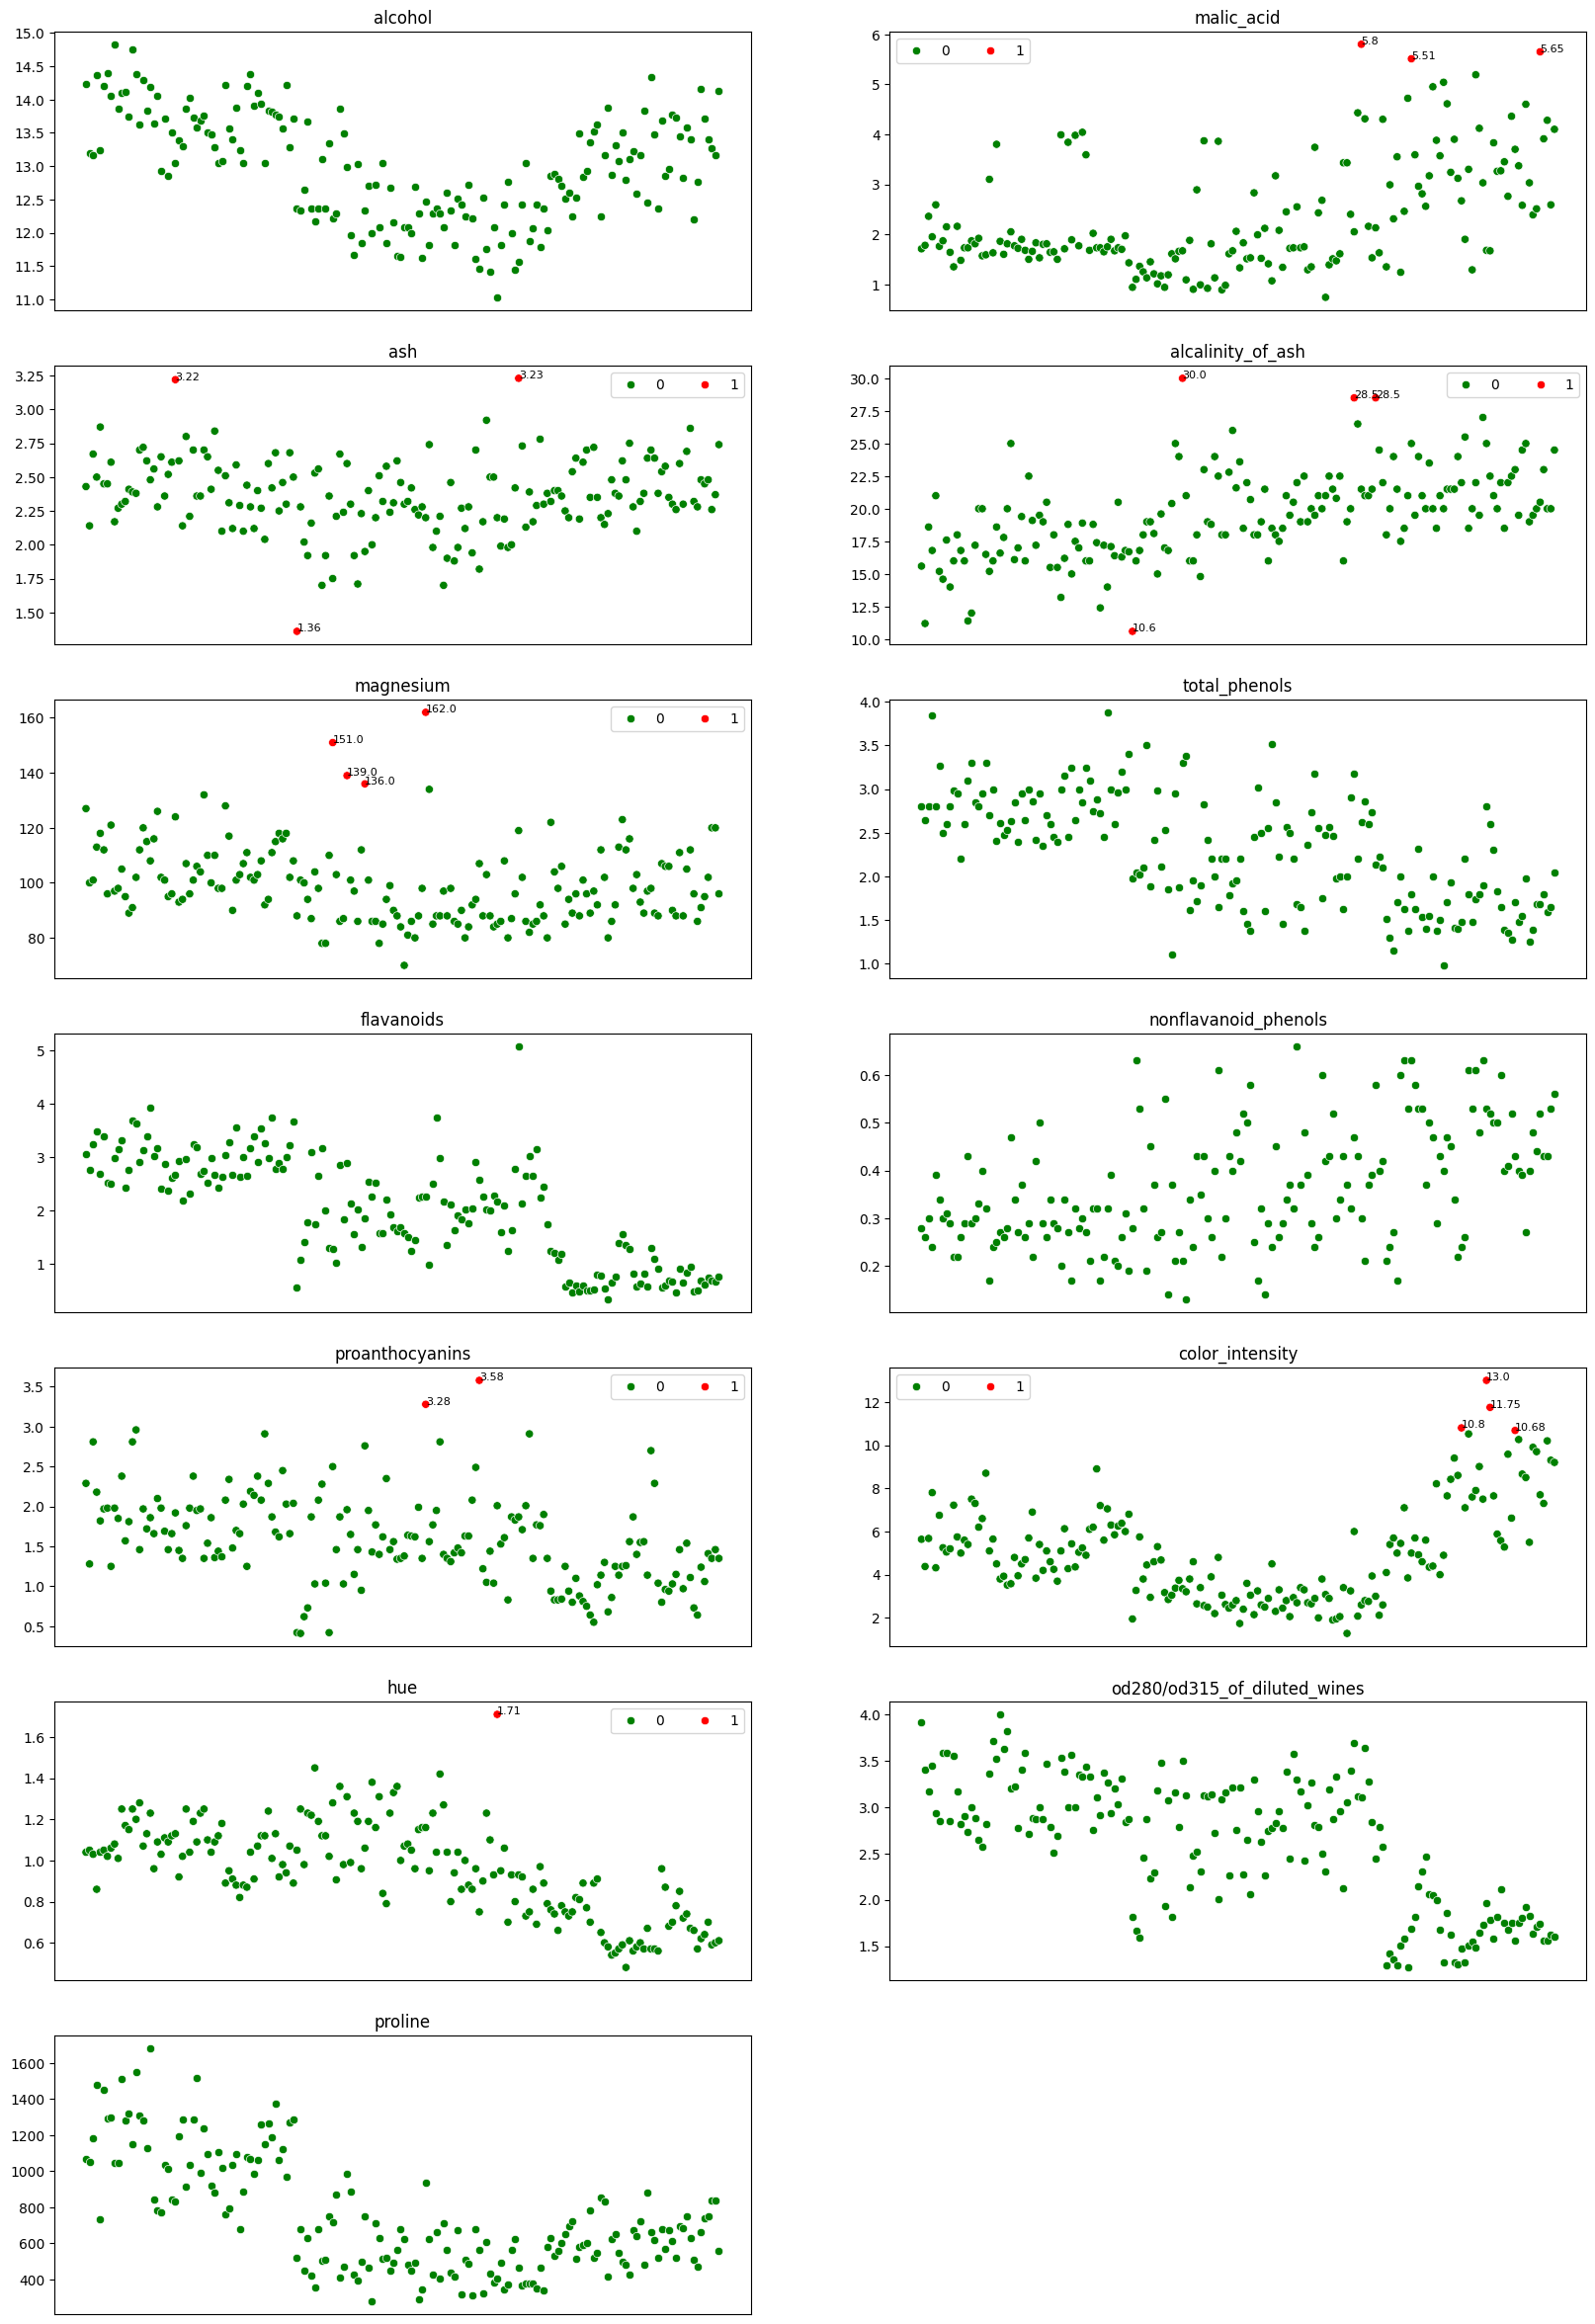

In [9]:
#FUNCTION TO IDENTIFY OUTLIERS USING IQR METHOD
def iqr_outlier(x,factor):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    min_ = q1 - factor * iqr
    max_ = q3 + factor * iqr
    result_ = pd.Series([0] * len(x))
    result_[((x < min_) | (x > max_))] = 1
    return result_
#SCATTER PLOTS HIGHLIGHTING OUTLIERS CALCULATED USING IQR METHOD
fig, ax = plt.subplots(7, 2, figsize=(20, 30))
row = col = 0
for n,i in enumerate(data.columns):
    if (n % 2 == 0) & (n > 0):
        row += 1
        col = 0
    outliers = iqr_outlier(data[i], 1.5)
   
    if sum(outliers) == 0:
        sns.scatterplot(x = np.arange(len(data[i])), y = data[i], ax = ax[row, col], legend=False, color = 'green')
    else:
        sns.scatterplot(x = np.arange(len(data[i])), y = data[i], ax = ax[row, col], hue = outliers, palette = ['green','red'])
    for x,y in zip(np.arange(len(data[i]))[outliers == 1], data[i][outliers == 1]):
        ax[row,col].text(x = x, y = y, s = y, fontsize = 8)
    ax[row,col].set_ylabel("")
    ax[row,col].set_title(i)
    ax[row,col].xaxis.set_visible(False)
    if sum(outliers) > 0:
        ax[row,col].legend(ncol=2)
    col += 1
ax[row,col].axis('off')
plt.show()

**Z-score** method is another method for detecting outliers. This method is generally used when a variable’ distribution looks close to Gaussian. Z-score is the number of standard deviations a value of a variable is away from the variable’ mean. \
Z-Score = (X-mean) / Standard deviation\
when the values of a variable are converted to Z-scores, then the distribution of the variable is called standard normal distribution with mean=0 and standard deviation=1. The Z-score method requires a cut-off specified by the user, to identify outliers. The widely used lower end cut-off is -3 and the upper end cut-off is +3. The reason behind using these cut-offs is, 99.7% of the values lie between -3 and +3 in a standard normal distribution. Lets look at the implementation of Z-Score method in Python.



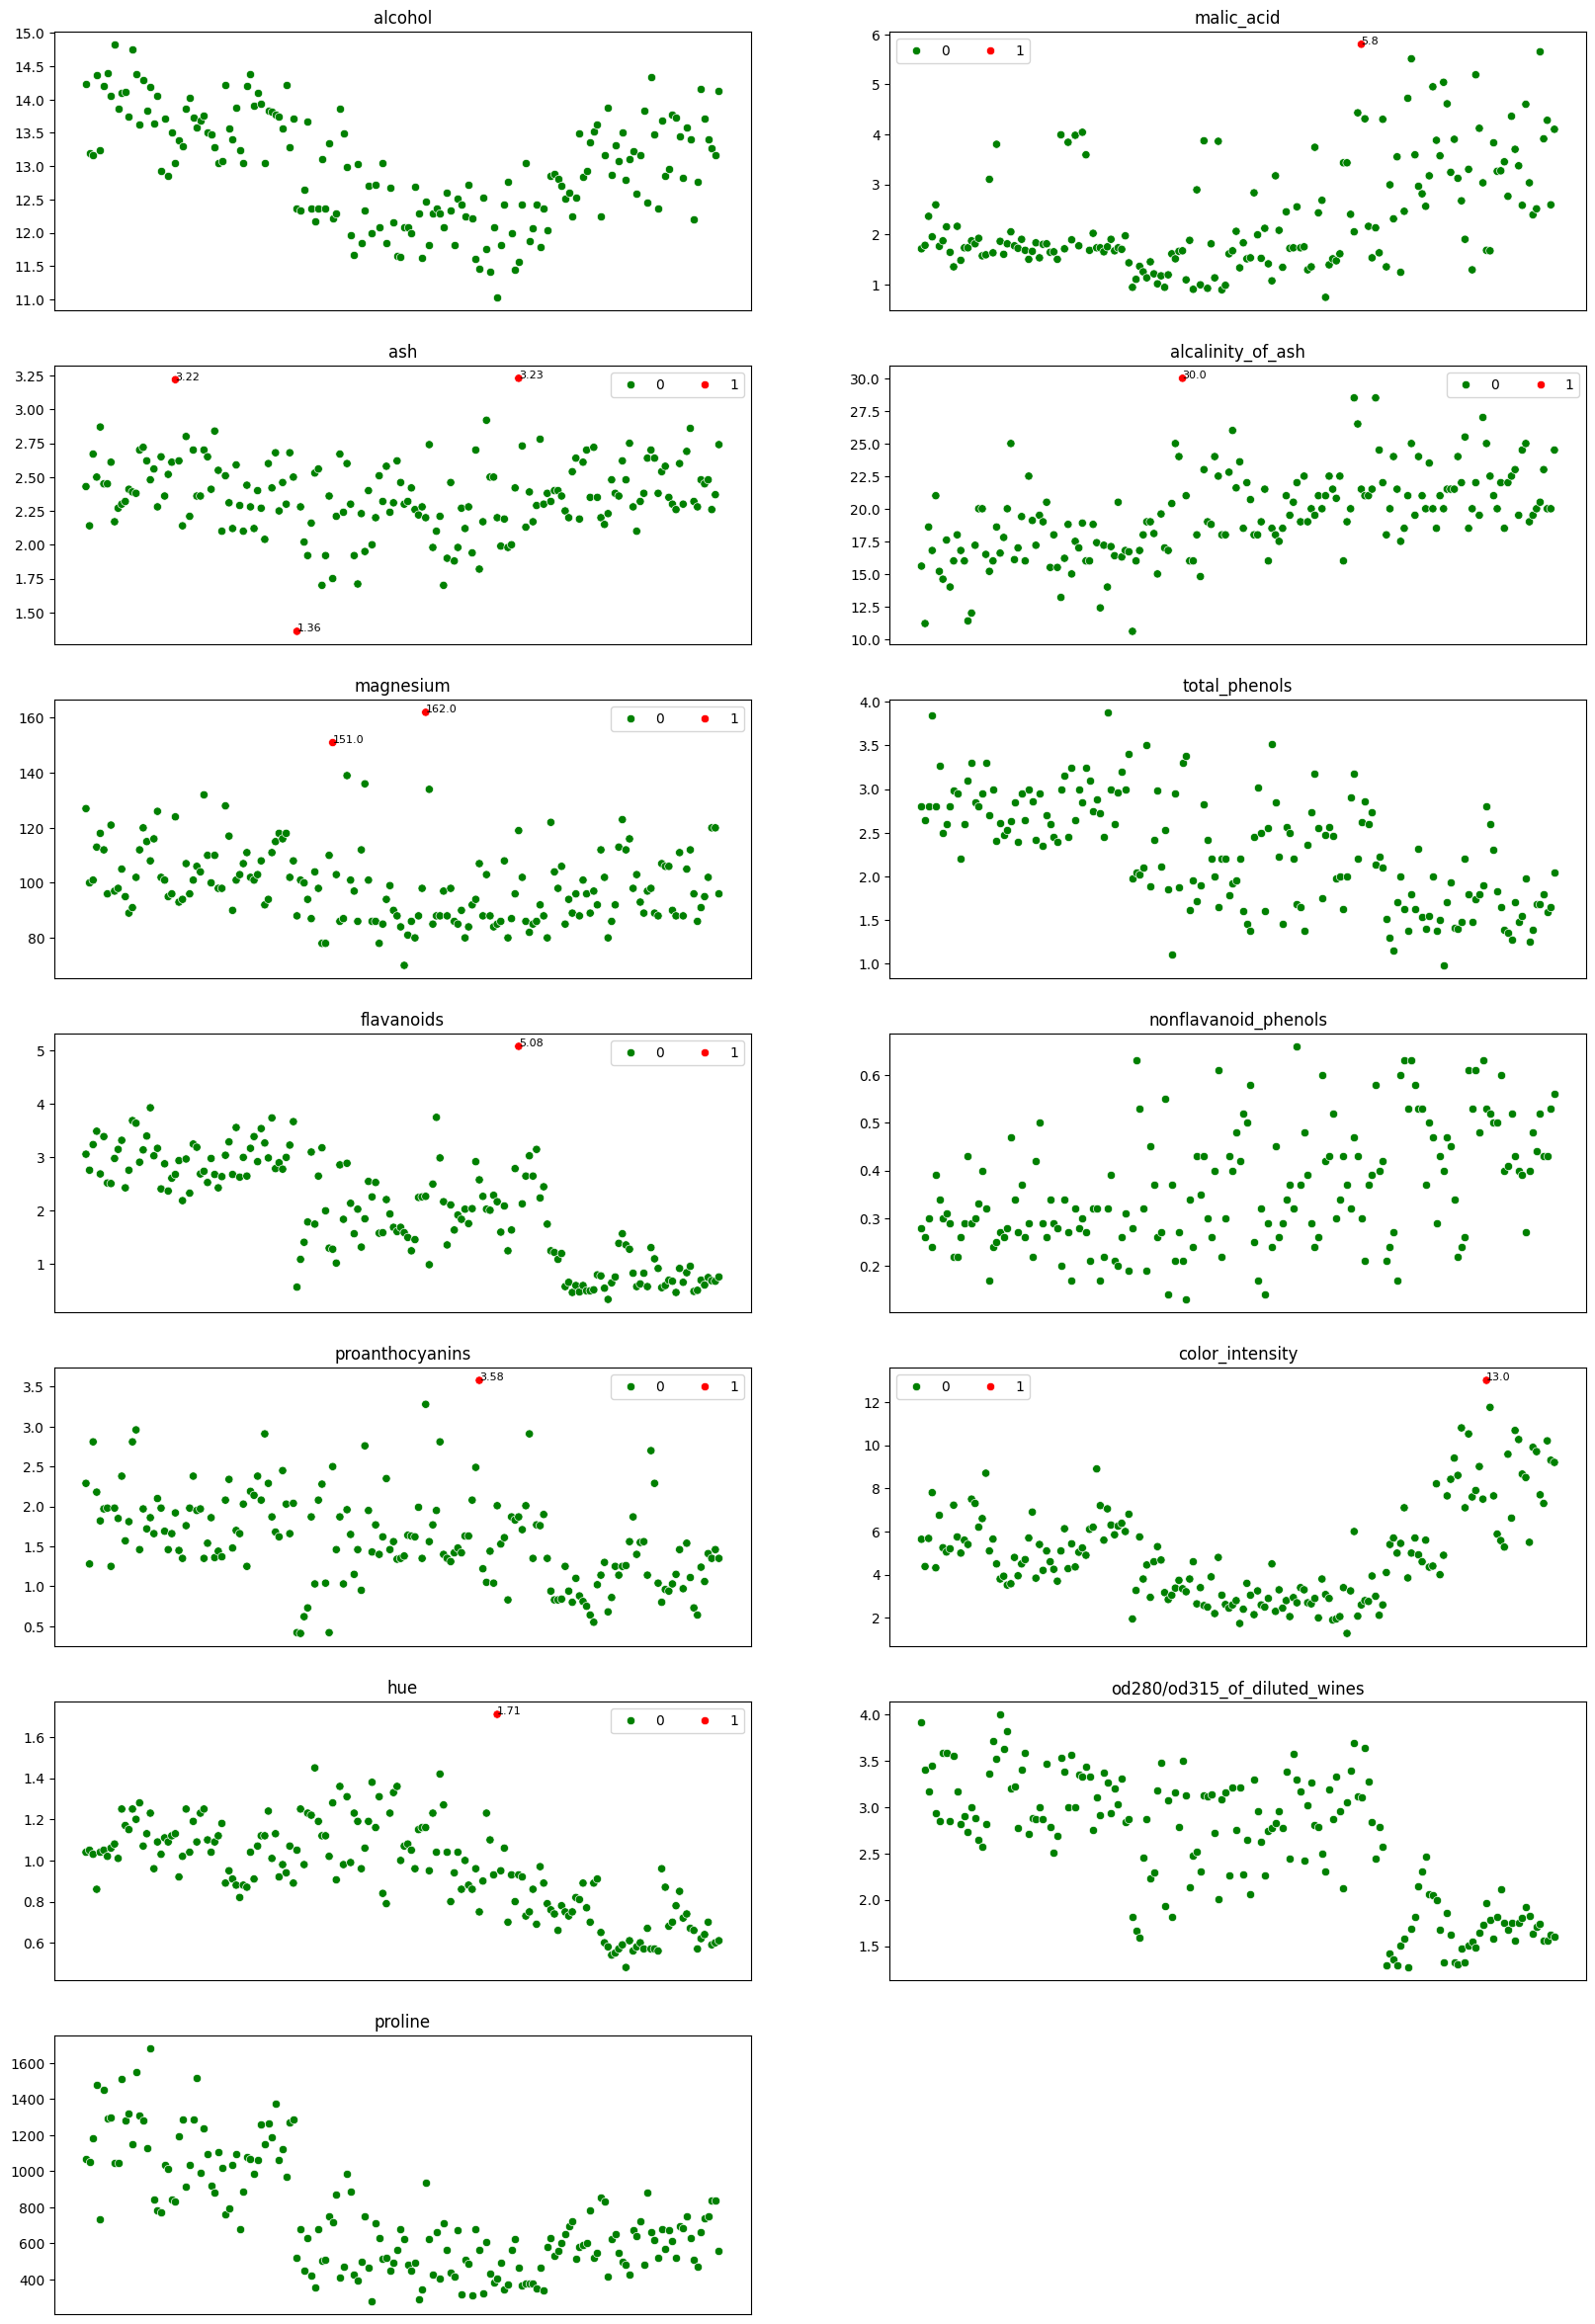

In [10]:

#FUNCTION TO DETECT OUTLIERS USING Z-SCORE METHOD
def zscore_outlier(x,lb,ub):
    zscore = ((x - x.mean()) / x.std()).copy()
    result_ = pd.Series([0] * len(x))
    result_[((zscore < lb) | (zscore > ub))] = 1
    return result_
#PLOTTING A SCATTER PLOT AND HIGHLIGHTING THE OUTLIERS DETECTED BY Z-SCORE METHOD
fig, ax = plt.subplots(7, 2, figsize=(20, 30))
row = col = 0
for n,i in enumerate(data.columns):
    if (n % 2 == 0) & (n > 0):
        row += 1
        col = 0
    outliers = zscore_outlier(data[i], -3, 3)
   
    if sum(outliers) == 0:
        sns.scatterplot(x = np.arange(len(data[i])), y = data[i], ax = ax[row, col], legend=False, color = 'green')
    else:
        sns.scatterplot(x = np.arange(len(data[i])), y = data[i], ax = ax[row, col], hue = outliers, palette = ['green','red'])
    for x,y in zip(np.arange(len(data[i]))[outliers == 1], data[i][outliers == 1]):
        ax[row,col].text(x = x, y = y, s = y, fontsize = 8)
    ax[row,col].set_ylabel("")
    ax[row,col].set_title(i)
    ax[row,col].xaxis.set_visible(False)
    if sum(outliers) > 0:
        ax[row,col].legend(ncol=2)
    col += 1
ax[row,col].axis('off')
plt.show()